# Computer Vision Perspective transform

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Perspective

(960, 720, 3)


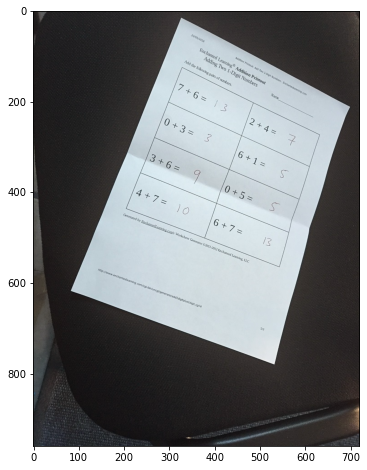

In [2]:
# Using this image
image = cv2.imread('img/scan.jpg')
plt.figure(figsize = (12,8))
plt.imshow(image);
print(image.shape)

In [ ]:
top_left  = [0,0]
top_right = [0,0]
bot_left  = [0,0]
bot_right = [0,0]
corners   = 0
window = 'Orginal' 
def mouse_action(event, x,y,flags, user):
    global corners
    global top_left
    if event == cv2.EVENT_LBUTTONUP:
        if corners == 0:
            top_left = [x,y]
            cv2.circle(user,(x,y),15,(0,255,0))
            cv2.imshow(window,user)
            corners += 1
        elif corners == 1:
            top_right = [x,y]
            cv2.circle(user,(x,y),15,(0,255,0))
            cv2.imshow(window,user)
            corners += 1
        elif corners == 2: 
            bot_left = [x,y]
            cv2.circle(user,(x,y),15,(0,255,0))
            cv2.imshow(window,user)
            corners += 1
        elif corners == 3:
            bot_right = [x,y]
            cv2.circle(user,(x,y),15,(0,255,0))
            cv2.imshow(window,user)
            corners += 1
        
def close_windows():
    cv2.destroyAllWindows()
    
def spin_image(img):
    original_coordinates = np.float32([top_left, top_right, bot_left, bot_right])
    new_coordinates = np.float32([[0,0], [420,0], [0,600], [420,600]])
    M = cv2.getPerspectiveTransform(original_coordinates, new_coordinates)
    warped = cv2.warpPerspective(img, M, (420,600))
    cv2.imshow("New Image", warped)
                                       
while(True):
    mi = image.copy()
    cv2.imshow(window,mi)
    cv2.setMouseCallback(window,mouse_action,mi)
    k = cv2.waitKey()
    if k == ord('s'):
        spin_image(mi)
    if k == 27: #ord('esc'):
        close_windows()
        cv2.waitKey(1)
        break


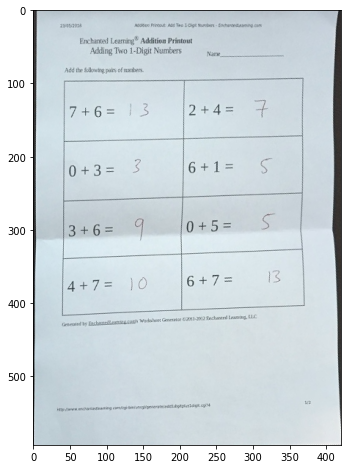

In [8]:
# We want to have the image of the paper straight up so we will need to change the perspective or the image
# Frist write the coordinates of the 4 corners of the original image
original_coordinates = np.float32([[?,?], [?,?], [?,?], [?,?]])

# Now write the coordinates of the 4 corners of the desired output
new_coordinates = np.float32([[0,0], [?,?], [?,?], [?,?]])
 
# Use the two sets of four points to compute the Perspective Transformation matrix, M  with getPerspectiveTransform  
M = ...
 
# Apply the perspective transformation matrix 
warped = ...

plt.figure(figsize = (12,8))
plt.imshow(warped);

[Hint](# "You will need to use the cv2 getPerspectiveTransform and warpPerspective functions") 
